Ce notebook a pour objectif de prédire si un passager du Titanic a survécu ou non en fonction de différentes caractéristiques.
Le dataset contient des informations sur les passagers comme leur âge, leur sexe, leur classe de billet, et d'autres caractéristiques.
Nous allons appliquer un modèle de régression logistique pour réaliser cette prédiction.

Importation de la bibliothèque pandas:

In [61]:
import pandas as pd

Chargement de dataset:

In [64]:
ti=pd.read_csv("C:\\Users\\MOI\\Desktop\\CO\\Titanic-Dataset.csv")

-1-Exploration et prétraitement des données:

Affichage des premières lignes pour avoir un aperçu du dataset.

In [68]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Afficher des informations sur le DataFrame.

In [71]:
ti.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

Analyse des données manquantes : Vérification de présence des valeurs manquantes pour les gérer.

In [74]:
ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Analyse des colonnes : Affichage  des statistiques des colonnes .

In [77]:
ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-2-Nettoyage et tronsformation des données:

suppression des colonnes qui n'ont pas d'impact sur la prédiction.

In [81]:
ti = ti.drop(["Name", "Ticket", "Cabin","PassengerId"], axis=1)

Remplacement des valeur manquantes du colonnes "age" et "Embarked" par leur moyenne et mode respectivement.

In [84]:
ti["Age"] = ti["Age"].fillna(ti["Age"].mean())
ti["Embarked"] = ti["Embarked"].fillna(ti["Embarked"].mode()[0])

Encodage des variables catégorielles : Transforme les colonnes non numériques en valeurs numériques (par exemple, 'Sex' : masculin = 1, féminin = 0).

In [87]:
ti["Sex"] = ti["Sex"].map({"female": 0, "male": 1})
ti = pd.get_dummies(ti, columns=["Embarked"], drop_first=True)

vérification de l'état de dataframe aprés les changements.

In [90]:
ti.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


In [92]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


-3-Création du modèle de prédiction:

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Séparation des données.

In [98]:
X = ti.drop('Survived', axis=1)  
y = ti['Survived'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Vérification des valeurs manquantes aprés l' appplication du modèle.

In [101]:
print(X_train.isnull().sum()) 
print(X_test.isnull().sum())

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


Création et entraînement du modèle.

In [104]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

-4-Évaluation du modèle:

Prédiction et évaluation : Fais des prédictions sur les données de test et évalue le modèle à l'aide de métriques comme la précision, la matrice de confusion.

In [108]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))


Accuracy: 0.8100558659217877
Confusion Matrix: [[90 15]
 [19 55]]


plus d'information

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



Vérifie quelles variables influencent le plus la survie.

In [114]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)

      Feature  Coefficient
5        Fare     0.002558
2         Age    -0.031325
6  Embarked_Q    -0.090067
4       Parch    -0.111068
3       SibSp    -0.297433
7  Embarked_S    -0.405029
0      Pclass    -0.940143
1         Sex    -2.588957


-5-Visualisation:

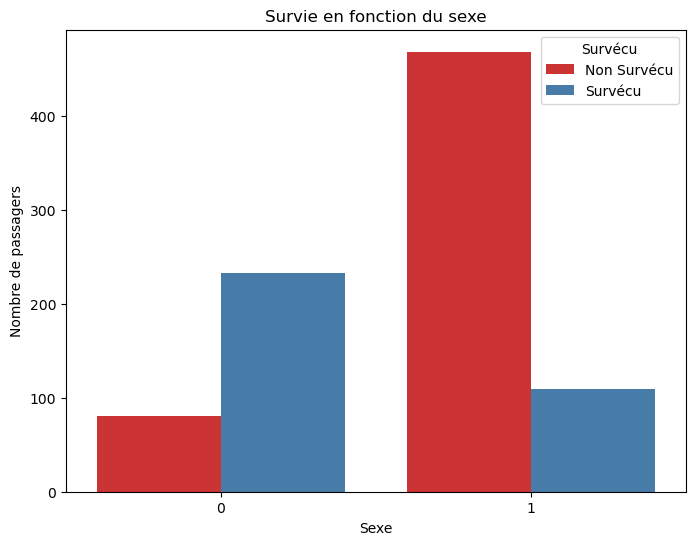

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=ti, x='Sex', hue='Survived', palette='Set1')
plt.title('Survie en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.legend(title='Survécu', loc='upper right', labels=['Non Survécu', 'Survécu'])
plt.show()


On remarque que les femmes ons plus de chance de survivre.

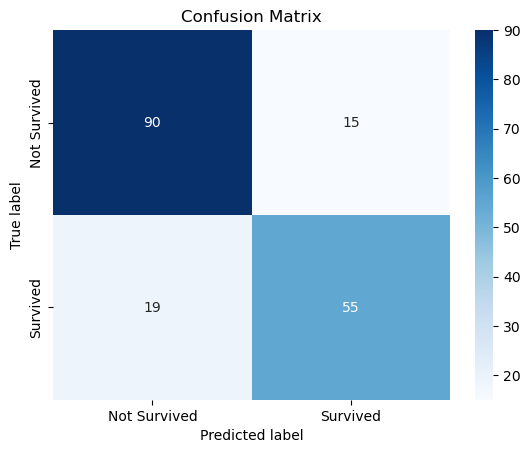

In [120]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


-6-Enregistrement du modèle:

In [123]:
import joblib
joblib.dump(model, 'titanic_model.pkl')


['titanic_model.pkl']

À travers cette analyse, nous avons exploré les données du Titanic, réalisé un nettoyage approfondi et testé plusieurs modèles de machine learning. Les résultats montrent que certaines variables comme le sexe et la classe des passagers ont un impact significatif sur la survie.

Le modèle de régression logistique a donné des résultats satisfaisants, mais des améliorations sont possibles en testant d'autres modèles plus complexes ou en optimisant davantage les features. Cette étude nous a permis de renforcer nos compétences en data science et nous ouvre la voie vers des analyses plus avancées à l'avenir.